# IRP - Conflict between Solar Power and Agriculture in Devon, England

* **Student ID:** 220005413

* **Due date:** 10/12/2024

* **Word count:** 2337

**Abstract:**

This research analyses the balance between food security and energy security in UK policy through exploring the land use conflict between solar power and agricultural quality in Devon. A multi-criteria evaluation was carried out using QGIS to determine solar power suitability across Devon. This was compared to shapefiles of Agricultural Land Classification (ALC) in the UK and python was used to quantify which ALC grades conflict most with solar suitability (Natural England, 2024). Overall, there appeared to be a correlation between solar power suitability and agricultural quality due to similar factors such as climate. The greatest conflict with 80% and over solar suitability was Grade 3 land: a conflict area of 687.7km$^2$. The report concludes that the proposed policy changes to prohibit solar farm construction on all Grade 3 land would greatly affect the industry in Devon (Rankl, 2023). Further research should be carried out on a UK-wide scale to fully analyse these conflicts and other sources of renewable energy should be included as they may provide a solution to this conflicting land use.

**Keywords:** Solar power, energy security, food security, ALC, BMV, South-West

# GitHub Repository
- **GitHub Link:** https://github.com/tabs-14/IRP

## Declaration

> In submitting this assignment, I hereby confirm that I have read the University's statement on Good Academic Practice. The following work is my own. Significant academic debts and borrowings have been properly acknowledged and referenced.


**Table of Contents:**

* Introduction
* Methodology
* Results
* Discussion
* Conclusion
* References
* Appendix


## Introduction

The UK government is aiming to reach net zero before 2050 with a 68% reduction in emissions by 2030 (Burnett et al, 2024). Decarbonisation of the energy and electricity sectors is necessary, this is reflected in the UK Government’s target to fully decarbonise the power system and increase solar power fivefold by 2035 (Rankl, 2023).
Devon was chosen as a site for this study due to its SW location within England and its unique position of having a north and south coastline increasing its solar radiation (Global Solar Atlas, 2019). Due to this it is a leading area for renewable energy within the UK (Ashby, 2019).
Farmland in the UK is graded using Agricultural Land Classification (ALC) on a scale of 1-5 based on its quality for growing crops (Natural England, 2024). To protect the highest quality land for food production, the UK government prevents building on the “best and most versatile” (BMV) land which includes Grades 1, 2 and 3a (Rankl, 2023). In 2022, there was debate in government about whether to include Grade 3b in BMV, which would prevent construction such as solar farms to occur on this land (Rankl, 2023).
This balance between food security and energy security is critical in the UK. Increasing the number of solar farms in the south will harness the sun’s energy, however increasing protection of farmland by changing BMVs would help the agricultural industry protect its land from development (Rankl, 2023). This report aims to compare the most suitable areas for solar power with different grades of agricultural land classification to determine the extent of this conflict.



## Methodology




#### Producing the solar power suitability map

After researching the requirements for solar farms, I decided on 7 criteria for their location and found open access shapefiles and rasters with these data and weighed them by importance for the multi-criteria evaluation (Sánchez-Lozano et al, 2013). These are shown in Table 1 and outlined below:

Photovoltaic power potential was weighed at 40% due to high electricity production being the key goal to increase the percentage of renewable energy (Burnett, 2024). The data source balances solar radiation with factors that would disrupt system performance, such as air temperature and pollution, resulting in a photovoltaic power potential raster for every country (Global Solar Atlas, 2019).

 Proximity to the national grid power lines (National Grid, 2024), has the second highest weight at 30% as exporting the energy produced by the solar farm to the national grid is necessary to contribute to the decarbonisation of UK electricity.

Proximity to main roads (OpenStreetMap, 2024), was weighed at 20%. This is for construction and maintenance of the site. Motorways and trunk roads were selected from the data source for this MCE to allow large vehicles to access the site.

The lowest slope angle, (Environment Agency, 2023) was the fourth factor at 10% as flat land would be better for construction. The slope constraint of having a slope angle of less than or equal to 5 degrees eliminates most unsuitable areas for a solar farm.

Avoiding Special Protected Areas (SPAs) and Special Areas of Conservation (SACs), ensures the protection of key wildlife areas, such as salt marsh habitats on Devon’s coast and the moors at Dartmoor National Park (JNCC, 2024) (Dartmoor National Park Authority, 2017).

Avoiding residential/ urban areas was the final constraint, as the aim is to produce a large-scale solar farm to contribute to the UK’s energy security rather than install roof top solar panels, open street map’s land use shapefiles were used for this (OpenStreetMap, 2024).

These datasets were uploaded to QGIS and clipped to the extent of Devon’s boundaries. A multi-criteria evaluation was carried out for solar power in Devon, resulting in a suitability map. The equation used was:

(0.4 * C1 + 0.3 * C2 + 0.2 * C3 + 0.1 * C4) *C5 * C6 *C7


| Criteria |	Desirable outcome	|Factor or constraint? |	Vector or raster?	|Weighting |
| --- | --- | ---| --- | --- |
|C1: Photovoltaic power potential |	Highest | 	Factor |	Raster	| 40% |
|C2: Powerlines |	Close as possible to 0m |	Factor |	Vector |	30% |
|C3: Main roads	| Close as possible to 0m |	Factor |	Vector |	20% |
|C4: Slope |	Close as possible to 0 degrees |	Factor |	Raster |	10% |
|C5: Slope |	Slope <=5 degrees |	Constraint |	Raster |	n/a |
|C6: Land use | Avoid SACs and SPAs |	Constraint |	Raster |	n/a |
|C7: Land use |  	Avoid residential areas |	Constraint |	Raster |	n/a |


*Table 1: Properties of each criteria layer for the solar suitability multi-criteria evaluation.*

#### Comparing solar suitability with agricultural grade

Agricultural land assessment (ALC) shapefiles were downloaded for England and clipped to Devon’s size (Natural England, 2024). The agricultural grade includes soil and site factors combined with climate and flood risk, grading farmland on a scale from 1 to 5. I categorised them into high (1 and 2 - excellent to very good quality), middle (3a and 3b – good to moderate quality) and low (4 and 5 – poor to very poor quality) (Natural England, 2024).

The categories were mapped on QGIS and multiplied with areas of over 80% solar suitability, calculated in the multi-criteria evaluation. This resulted in conflict maps for high, middle and low grade. The solar suitability map, agricultural grades and the three conflict rasters were uploaded to python and mapped using rasterio and matplotlib. Numpy was used to calculate the total areas of conflict, and this was plotted using matplotlib. See appendix for python code and calculations.


## Results



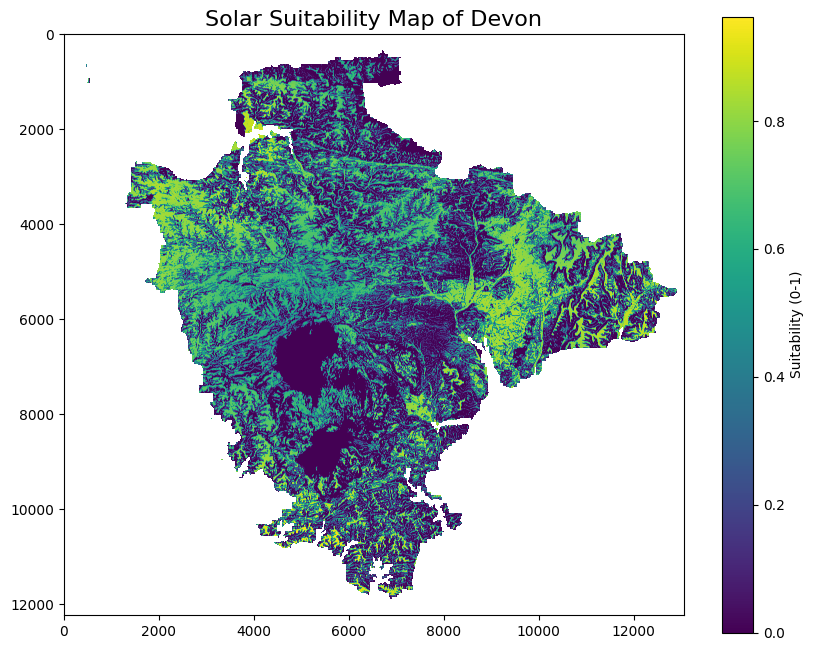

In [ ]:
with rio.open('/content/drive/MyDrive/Colab Notebooks/IRP/data/SolarSuitabilityMap.tif') as src:
  raster_data = src.read(1)
  nodata_value = src.nodata

    # Mask out values with no data (outside of Devon's boundaries)
  if nodata_value is not None:
        raster_data = np.ma.masked_equal(raster_data, nodata_value)

plt.figure(figsize=(10, 8))
plt.imshow(raster_data, cmap='viridis')
plt.colorbar(label='Suitability (0-1)')
plt.title('Solar Suitability Map of Devon', fontsize=16)

# Show the plot
plt.show()

*Figure 1: Suitability map for solar farms in Devon*

The suitability map, Figure 1, shows the gradient of suitability for solar farms in Devon, calculated using multi-criteria analysis. Lighter areas are more suitable, the dark blue areas are unsuitable due to the constraints. There is a trend of more coastal areas being more suitable, with both coastlines (the south-east and north-west sides of the map) being the lightest areas. The darkest, therefore most unsuitable areas are in the centre.

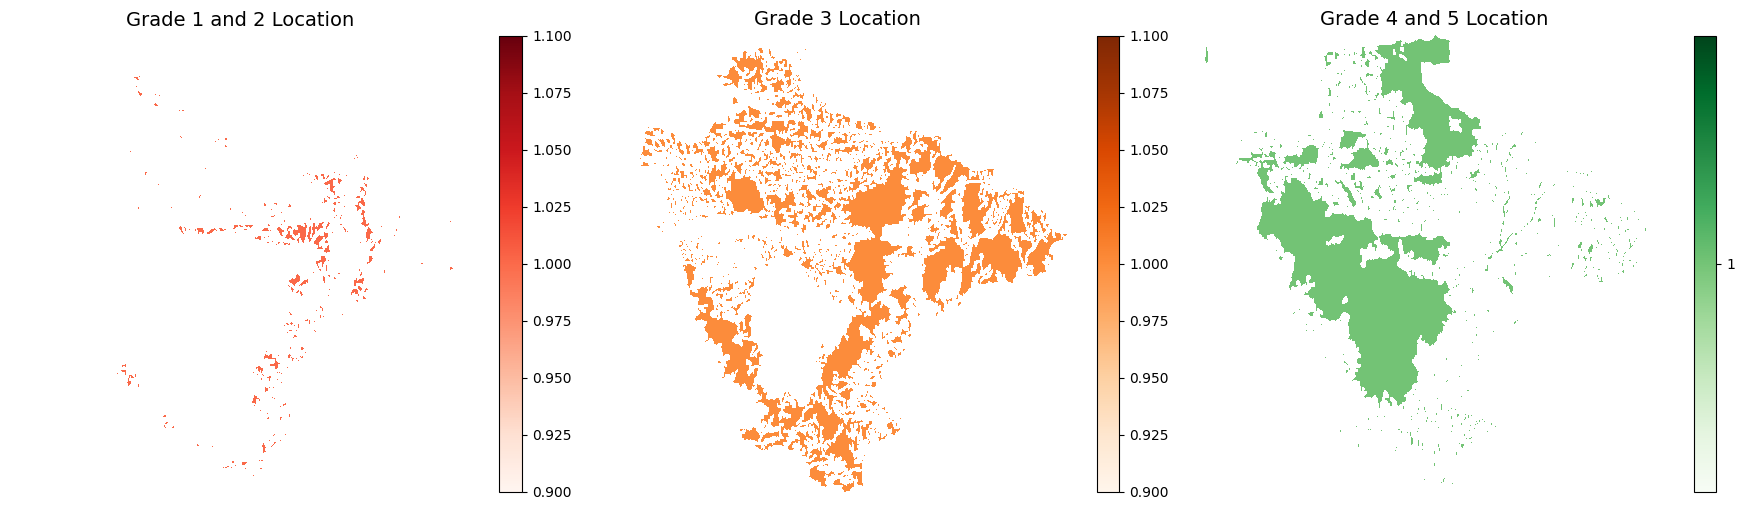

In [ ]:
raster_paths = ['/content/drive/MyDrive/Colab Notebooks/IRP/data/high grade_clipped.tif','/content/drive/MyDrive/Colab Notebooks/IRP/data/grade3_clipped.tif', '/content/drive/MyDrive/Colab Notebooks/IRP/data/G4_5clipped.tif']

fig, axs = plt.subplots(1, 3, figsize=(18,6)) #put the three figures next to each other

#mask out areas with no data (outside Devon's borders)
with rio.open(raster_paths[0]) as src:
  raster_data1 = src.read(1)
  nodata_value1 = src.nodata
  if nodata_value is not None:
      raster_data1 = np.ma.masked_equal(raster_data1, nodata_value1)

#customise the colour and title for each figure
  im1 = axs[0].imshow(raster_data1, cmap='Reds')
  axs[0].set_title('Grade 1 and 2 Location', fontsize=14)
  axs[0].axis('off')
  fig.colorbar(im1, ax=axs[0], shrink=0.8)

with rio.open(raster_paths[1]) as src:
    raster_data2 = src.read(1)
    nodata_value2 = src.nodata
    if nodata_value2 is not None:
        raster_data2 = np.ma.masked_equal(raster_data2, nodata_value2)

    im2 = axs[1].imshow(raster_data2, cmap='Oranges')
    axs[1].set_title('Grade 3 Location', fontsize=14)
    axs[1].axis('off')
    fig.colorbar(im2, ax=axs[1], shrink=0.8)

with rio.open(raster_paths[2]) as src:
    raster_data3 = src.read(1)
    nodata_value3 = src.nodata
    if nodata_value3 is not None:
        raster_data3 = np.ma.masked_equal(raster_data3, nodata_value3)

    im3 = axs[2].imshow(raster_data3, cmap='Greens')
    axs[2].set_title('Grade 4 and 5 Location', fontsize=14)
    axs[2].axis('off')
    fig.colorbar(im3, ax=axs[2], ticks=[0,1], shrink=0.8)

plt.tight_layout()
plt.show() #plot all 3

*Figures 2, 3 and 4: Location of high, middle and low agricultural grades respectively.*

Figures 2-4 show the best quality agricultural land tends to be on the south coast and the lowest further inland. There is a great difference between the land cover of each grade, with Grades 1 and 2 covering a very small area. Grade 3 is the most widespread and Grades 4 and 5 are mostly compacted into two large sections: in the south-west and the north.

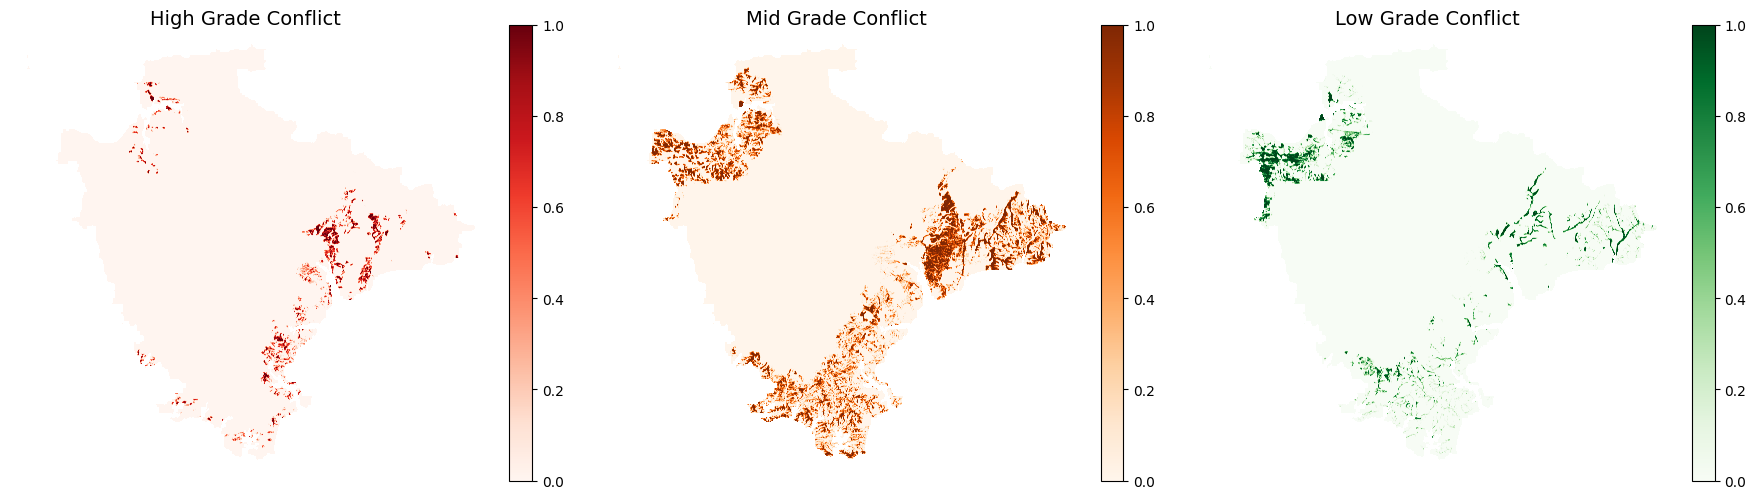

In [ ]:
raster_paths = ['/content/drive/MyDrive/Colab Notebooks/IRP/data/0.8grade1and2.tif','/content/drive/MyDrive/Colab Notebooks/IRP/data/0.8_Grade3.tif', '/content/drive/MyDrive/Colab Notebooks/IRP/data/0.8grade4and5.tif']

fig, axs = plt.subplots(1, 3, figsize=(18,6))

#open rasters and mask out no data values (areas outside Devon's borders)
with rio.open(raster_paths[0]) as src:
  raster_data1 = src.read(1)
  nodata_value1 = src.nodata
  if nodata_value is not None:
      raster_data1 = np.ma.masked_equal(raster_data1, nodata_value1)

#change the colour and titles of each plot
  im1 = axs[0].imshow(raster_data1, cmap='Reds')
  axs[0].set_title('High Grade Conflict', fontsize=14)
  axs[0].axis('off')
  fig.colorbar(im1, ax=axs[0], shrink=0.8)

with rio.open(raster_paths[1]) as src:
    raster_data2 = src.read(1)
    nodata_value2 = src.nodata
    if nodata_value2 is not None:
        raster_data2 = np.ma.masked_equal(raster_data2, nodata_value2)

    im2 = axs[1].imshow(raster_data2, cmap='Oranges')
    axs[1].set_title('Mid Grade Conflict', fontsize=14)
    axs[1].axis('off')
    fig.colorbar(im2, ax=axs[1], shrink=0.8)

with rio.open(raster_paths[2]) as src:
    raster_data3 = src.read(1)
    nodata_value3 = src.nodata
    if nodata_value3 is not None:
        raster_data3 = np.ma.masked_equal(raster_data3, nodata_value3)

    im3 = axs[2].imshow(raster_data3, cmap='Greens')
    axs[2].set_title('Low Grade Conflict', fontsize=14)
    axs[2].axis('off')
    fig.colorbar(im3, ax=axs[2], shrink=0.8)

plt.tight_layout()
plt.show()

*Figures 5, 6 and 7: Conflict areas between 80% and over solar suitability and high, middle and low agricultural grades respectively.*

Figures 5-7 highlight conflicting areas of 80% solar suitability and different agricultural land classifications. Figure 5 shows that there are few areas where the most suitable land for solar farms conflicts with the highest grade (excellent to very good quality) agricultural land. Figure 6 shows large areas of high solar suitability overlapping with Grade 3 land, in both the south and the north. In contrast, Figure 7 shows there far less overlap between lower grade land and 80% solar suitability. Overall, these figures confirm the results shown in Figure 1, that the areas more than 80% suitable for solar farms are in the coastal locations.

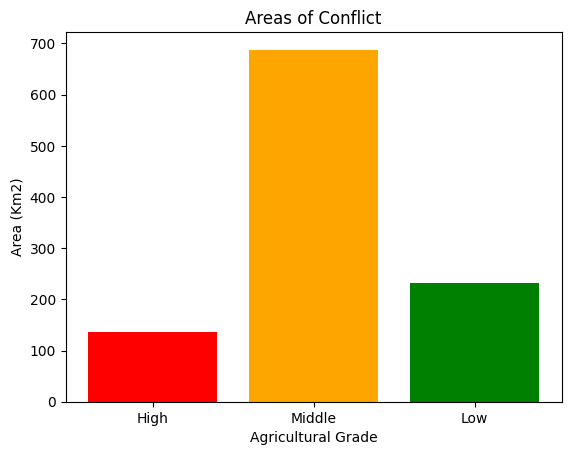

In [ ]:
#see Appendix 3 for calculations
high_grade = high_area_conflict/1000000
middle_grade = mid_area_conflict/1000000
low_grade = low_area_conflict/1000000

labels = ['High', 'Middle', 'Low']
values = [high_grade, middle_grade, low_grade]

#simple bar chart to show differences
plt.bar(labels, values, color = ['red', 'orange', 'green']) #same colours as previous plots
plt.title('Areas of Conflict')
plt.xlabel('Agricultural Grade')
plt.ylabel('Area (Km2)')

plt.show()

*Figure 8: Bar chart showing total conflict area (km$^2$) of over 80% solar suitability and agricultural Grade.*

Figure 8 quantifies the results shown in Figures 5-7, clearly showing the differences in overlap between solar suitability and the three categories of agricultural grade. The value of 687.6km$^2$ for Grade 3 is around five times higher than Grades 1 and 2, and three times higher than Grades 4 and 5.

## Discussion

The suitability map, Figure 1, shows that based on the factors outlined in Methodology, the most suitable areas of Devon for a solar farm to produce the most power for the national grid would be the most easterly, westerly and southerly extremities of the country. Devon is a hilly county and the majority of its centre is less suitable due to the slope constraint (Environment Agency, 2023). The large unsuitable patches in the south-east are part of Dartmoor National Park and are protected as Special Areas of Conservation due to its rich wildlife and heritage (Dartmoor National Park Authority, 2017). Without factoring in the agricultural grade, the best location for solar power to would be the east of Figure 1. It has large rural areas of flat land, high photovoltaic potential and connectivity due to its proximity to Exeter and the M5 (Google maps, 2024).

The trends in Figures 2-4 show that agricultural quality greatly varies across Devon, with higher quality on the south coast and lower inland. Grades 3, 4 and 5 cover the vast majority of Devon’s area. The large areas of Grade 4 and 5, shown in Figure 4, are the Dartmoor moorlands, whose environmental factors make it unsuitable for agriculture (Dartmoor National Park Authority, 2017).

The comparisons between solar suitability and agricultural quality presented in Figures 5-7 show that the greatest overlap with 80% solar suitability is overwhelmingly Grade 3. Despite there being little area of overlap with the highest agricultural grades (1 and 2), only 136.5 km$^2$, when Figures 2 and 4 are compared, most of the high Grade land fits with over 80% solar suitability, therefore this trend is likely due to high grades covering the least overall area of Devon. Grades 1 and 2 are classed as BMV in policy which prohibits construction such as solar farms from taking place. Therefore, fact these grades have the lowest area of overlap is a positive to conserve the highest quality agricultural land for food production.

The overlap with Grade 3 is large, with 687.6 km$^2$ (Figure 8) being around 10% of the total area. While solar farm construction on lower grades would be ideal to preserve food security, it may not always be possible due to this large overlap. The proposed changes to BMVs in 2022 would have prevented solar farm construction on all Grade 3 land, which would leave very few areas that are most suitable for solar farms (Ranki, 2023).

The fact there is such a low overlap in low grade land and high solar suitability despite there being large areas of Grade 4 and 5 land in Devon suggests there may be a link between the two variables. Both solar and agricultural suitability rely on similar factors such as climate, solar radiation and terrain, which has left the majority of Grade 4 and 5 land in the centre of the county along with the lowest solar suitability.

A limitation in the data is that the ALC shapefiles did not subset Grade 3 into 3a and 3b, yet current BMV classifications include 3a but not 3b. It would be useful to visualise how much of the Grade 3 category consists of each subset as this relates to policy issues. Additionally, this report did not consider the long-term suitability of the solar farms which may change in the future due to changing rainfall patterns, cloud cover, coastal erosion and flood risk due to climate change (Burnett, Barbour and Harrison, 2014); this is a key area for future research.

To increase understanding of the potential for clean energy to contribute to the UK’s energy security, other renewable energy sources such as wind and hydro power in Devon should be analysed in future studies. These could provide a solution to the conflicting land use between solar power and agriculture due to differing factors and constraints (Watson and Hudson, 2015). Upscaling these comparisons to a UK-wide scale will be the most effective way of increasing understanding and encouraging policy decisions around ALCs.


## Conclusion

To conclude, there are conflicts between the most suitable land for solar farms and higher quality agricultural land. Restricting solar farm construction to only Grades 4 and 5 would have large consequences on the industry in Devon due the vast majority of over 80% suitable land being in the Grade 3 category, 697.6km$^2$, compared to only 232.2 km$^2$ in Grades 4 and 5. The politics of agricultural land classification and determining BMVs has large impacts on the solar power industry and resulted in outrage at the 2022 proposals (Rankl, 2024). Balancing food and energy security is a key concern in the UK and further research should expand to other forms of renewable energy such as wind and hydro power to examine if they can thrive on poorer quality agricultural land (Sharifzadeh, Lubiano-Walochik and Shah, 2017). To reach the best compromise for the UK, a holistic view which scales up to the whole UK and factors in future sustainability to the effects of climate change is necessary.


## References

Ashby, A. (2019). The Success of the South West of the UK in Renewable Energy Generation: Benefits, Challenges and Implications for Other Regions. In: N. Mouraviev and A. Koulouri, eds., Energy Security. Switzerland: Springer Nature, pp.197–221.

Burnett, D., Barbour, E. and Harrison, G.P. (2014). The UK solar energy resource and the impact of climate change. Renewable Energy, 71, pp.333–343. doi:https://doi.org/10.1016/j.renene.2014.05.034.

Burnett, N., Stewart, I., Hinson, S., Tyers, R., Hutton, G., Malik, X. (2024). The UK’s plans and progress to reach net zero by 2050. House of Commons Library, pp. 1-28.

Dartmoor National Park Authority (2017). Home | Dartmoor. [online] www.dartmoor.gov.uk. Available at: https://www.dartmoor.gov.uk/ [Accessed 5 Dec. 2024].

Environment Agency. (2023) ‘LIDAR Composite Digital Terrain Model (DTM) 10m’. Available at: https://www.data.gov.uk/dataset/7f31af0f-bc98-4761-b4b4-147bfb986648/lidar-composite-digital-terrain-model-dtm-10m [Accessed Nov. 2024].

Global Solar Atlas (2019). Global Solar Atlas. [online] globalsolaratlas.info. Available at: https://globalsolaratlas.info/download/united-kingdom [Accessed 28 Nov. 2024].

Google Maps (2024). Google Maps. [online] Google Maps. Available at: https://www.google.co.uk/maps [Accessed Dec. 2024].

JNCC. (2024) ‘Boundaries of Special Areas of Conservation of Great Britain’. Available at: https://jncc.gov.uk/our-work/uk-protected-area-datasets-for-download/ [Accessed Nov. 2024].

JNCC. (2024) ‘Boundaries of Special Protection Areas of Great Britain’. Available at: https://jncc.gov.uk/our-work/uk-protected-area-datasets-for-download/ [Accessed Nov. 2024].

National Grid UK. (2024) ‘Cables’. Available at: https://www.nationalgrid.com/electricity-transmission/network-and-infrastructure/network-route-maps [Accessed Nov. 2024].

Natural England. (2024) ‘Provisional Agricultural Land Classification (ALC)’. Available at: https://www.data.gov.uk/dataset/952421ec-da63-4569-817d-4d6399df40a1/provisional-agricultural-land-classification-alc [Accessed Dec. 2024].

OpenStreetMap. (2024) ‘devon-latest.osm’. Available at: https://download.geofabrik.de/europe/united-kingdom/england/devon.html [Accessed Nov. 2024].

Rankl, F. (2023). Planning and Solar Farms Debate Pack. House of Commons Library, pp.1–30.

Sánchez-Lozano, J.M., Teruel-Solano, J., Soto-Elvira, P.L. and Socorro García-Cascales, M. (2013). Geographical Information Systems (GIS) and Multi-Criteria Decision Making (MCDM) methods for the evaluation of solar farms locations: Case study in south-eastern Spain. Renewable and Sustainable Energy Reviews, 24, pp.544–556. doi:https://doi.org/10.1016/j.rser.2013.03.019.

Sharifzadeh, M., Lubiano-Walochik, H. and Shah, N. (2017). Integrated renewable electricity generation considering uncertainties: The UK roadmap to 50% power generation from wind and solar energies. Renewable and Sustainable Energy Reviews, 72, pp.385–398. doi:https://doi.org/10.1016/j.rser.2017.01.069.

Watson, J.J.W. and Hudson, M.D. (2015). Regional Scale wind farm and solar farm suitability assessment using GIS-assisted multi-criteria evaluation. Landscape and Urban Planning, 138, pp.20–31. doi:https://doi.org/10.1016/j.landurbplan.2015.02.001.



## Appendix



Appendix 1: Mounting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Appendix 2: Installing necessary libraries

In [ ]:
pip install contextily

In [ ]:
pip install mapclassify

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import contextily as ctx
import rasterio as rio
from rasterio import plot

Appendix 3: Conflict areas calculations

In [ ]:
highgrade = rio.open('/content/drive/MyDrive/Colab Notebooks/IRP/data/0.8grade1and2.tif')
middle = rio.open('/content/drive/MyDrive/Colab Notebooks/IRP/data/0.8_Grade3.tif')
lowgrade = rio.open('/content/drive/MyDrive/Colab Notebooks/IRP/data/0.8grade4and5.tif')


middle_data = middle.read(1)
transform = middle.transform

pixel_width = transform[0]
pixel_height = -transform[4]
pixel_area = pixel_width * pixel_height

#calculating total area for Grade 3 (middle)
num_mid_conflict_pixels = np.sum(middle_data == 1)

mid_area_conflict = num_mid_conflict_pixels * pixel_area
print(f"Total area of conflict with Grade 3: {mid_area_conflict} square metres")

Total area of conflict with Grade 3: 687685876.1741837 square metres


In [ ]:
#calculating total area for Grade 1 and 2 (high)
high_data = highgrade.read(1)
num_high_conflict_pixels = np.sum(high_data == 1)

high_area_conflict = num_high_conflict_pixels * pixel_area
print(f"Total area of conflict with Grade 1 and 2: {high_area_conflict} square metres")

Total area of conflict with Grade 1 and 2: 136551170.3940741 square metres


In [ ]:
#calculating total area for Grade 4 and 5 (low)
low_data = lowgrade.read(1)
num_low_conflict_pixels = np.sum(low_data == 1)

low_area_conflict = num_low_conflict_pixels * pixel_area
print(f"Total area of conflict with Grade 4 and 5: {low_area_conflict} square metres")

Total area of conflict with Grade 4 and 5: 232272840.33688098 square metres
